In [1]:
import pandas as pd
import numpy as np

##### Simple Random Sampling

In [4]:
np.random.randint(1,100)

59

In [7]:
data = [np.random.randint(1,100) for _ in range(100)]

In [8]:
df = pd.DataFrame({
    'id': range(1,101),
    'value': data
})

In [9]:
df

,id,value
0,1,73
1,2,74
2,3,20
3,4,89
4,5,15
...,...,...
95,96,62
96,97,87
97,98,48
98,99,86


In [16]:
new = df.sample(n=10, random_state=1)

In [17]:
new

,id,value
80,81,47
84,85,76
33,34,57
81,82,22
93,94,46
17,18,68
36,37,33
82,83,53
69,70,57
65,66,63


In [18]:
df['value'].mean()

47.99

In [19]:
new['value'].mean()

52.2

In [20]:
df['value'].std()

28.18069222253801

In [21]:
new['value'].std()

16.074825037928093

##### Stratified Sampling

In [23]:
np.random.choice(['A','B','C'], 10)

array(['C', 'B', 'A', 'C', 'B', 'B', 'B', 'A', 'A', 'C'], dtype='<U1')

In [32]:
np.random.seed(0)
df = pd.DataFrame({
    'id': range(1,101),
    'value': np.random.randint(1,100, 100),
    'category': np.random.choice(['A','B','C'], 100)
})

In [33]:
df

,id,value,category
0,1,45,A
1,2,48,B
2,3,65,C
3,4,68,A
4,5,68,B
...,...,...,...
95,96,86,B
96,97,49,B
97,98,50,A
98,99,70,A


In [34]:
import matplotlib.pyplot as plt

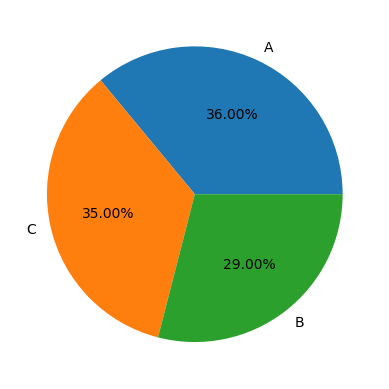

In [35]:
plt.pie(df['category'].value_counts(), 
        labels=df['category'].value_counts().index, autopct='%2.2f%%');

In [36]:
new = df.sample(20, random_state=0)

In [37]:
new

,id,value,category
26,27,21,C
86,87,77,C
2,3,65,C
55,56,37,C
75,76,15,B
93,94,80,B
16,17,40,A
73,74,92,B
54,55,1,C
95,96,86,B


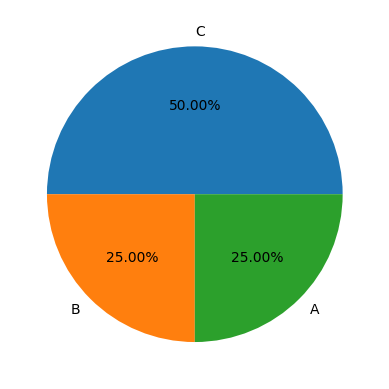

In [38]:
plt.pie(new['category'].value_counts(), 
        labels=new['category'].value_counts().index, autopct='%2.2f%%');

In [39]:
def stratified_sample(df, strata_col, sample_size):
    # Group by the strata column
    grouped = df.groupby(strata_col)
    # Calculate sample size per group
    n_per_group = sample_size // grouped.ngroups
    # Perform sampling
    stratified_sample = grouped.apply(lambda x: x.sample(
        n=n_per_group, random_state=1)).reset_index(drop=True)
    return stratified_sample

In [42]:
sdf = stratified_sample(df, 'category', 21)

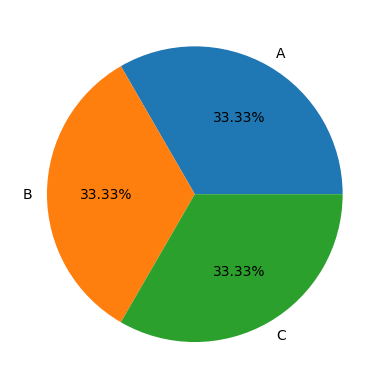

In [43]:
plt.pie(sdf['category'].value_counts(), 
        labels=sdf['category'].value_counts().index, autopct='%2.2f%%');

In [51]:
def propotional_stratified_sample(df, strata_col, sample_size):
    # Group by the strata column
    grouped = df.groupby(strata_col)
    # Perform propotional sampling
    stratified_sample = grouped.apply(lambda x: x.sample(
        frac = sample_size/len(df), random_state=1)).reset_index(drop=True)
    return stratified_sample

In [49]:
ndf = propotional_stratified_sample(df, 'category', 20)

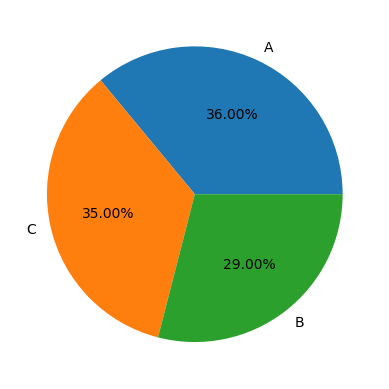

In [52]:
plt.pie(ndf['category'].value_counts(), 
        labels=ndf['category'].value_counts().index, autopct='%2.2f%%');

##### Cluster Based Sampling

In [54]:
df = pd.DataFrame({
    'id': range(1,101),
    'value': np.random.randint(1,100, 100),
    'cluster': np.random.choice(['cluster1','cluster2','cluster3',
                                 'cluster4','cluster5'], 100)
})

In [55]:
df

,id,value,cluster
0,1,19,cluster4
1,2,41,cluster4
2,3,55,cluster2
3,4,80,cluster3
4,5,12,cluster5
...,...,...,...
95,96,3,cluster1
96,97,70,cluster4
97,98,13,cluster2
98,99,45,cluster5


In [56]:
def cluster_sample(df, cluster_col, num_clusters):
    # Get unique clusters
    clusters = df[cluster_col].unique()
    # Randomly select the desired number of clusters
    selected_clusters = np.random.choice(clusters, num_clusters, replace=False)
    # Select all rows from the chosen clusters
    cluster_sampled_data = df[df[cluster_col].isin(selected_clusters)]
    return cluster_sampled_data

In [59]:
cluster_sample(df, 'cluster', 3)

,id,value,cluster
2,3,55,cluster2
3,4,80,cluster3
4,5,12,cluster5
7,8,2,cluster2
8,9,96,cluster2
9,10,45,cluster2
10,11,89,cluster2
11,12,25,cluster3
14,15,4,cluster2
15,16,77,cluster5


##### Systematic Sampling

In [61]:
df = pd.DataFrame({
    'id': range(1,101),
    'value': np.random.randint(1,100, 100)
})

In [62]:
def systematic_sample(df, sample_size):
    # Calculate the sampling interval
    k = len(df) // sample_size
    # Generate a random start
    start = np.random.randint(0, k)
    # Select every k-th element starting from the random start
    systematic_sample = df.iloc[start::k].reset_index(drop=True)
    return systematic_sample

In [70]:
systematic_sample(df, 10)

,id,value
0,3,26
1,13,87
2,23,43
3,33,44
4,43,77
5,53,1
6,63,61
7,73,34
8,83,85
9,93,8


##### Stratification

In [72]:
import seaborn as sns

In [73]:
iris = sns.load_dataset('iris')

In [74]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [75]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [79]:
train, test = train_test_split(iris, random_state=0)

In [80]:
train['species'].value_counts()

species
virginica     41
setosa        37
versicolor    34
Name: count, dtype: int64

In [81]:
test['species'].value_counts()

species
versicolor    16
setosa        13
virginica      9
Name: count, dtype: int64

In [83]:
train, test = train_test_split(iris, random_state=0, stratify=iris['species'])

In [84]:
train['species'].value_counts()

species
virginica     38
versicolor    37
setosa        37
Name: count, dtype: int64

In [85]:
test['species'].value_counts()

species
setosa        13
versicolor    13
virginica     12
Name: count, dtype: int64